In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

In [ ]:
df = pd.read_csv(r'/content/Avg.csv')
df = df[['Date','INR','CHF','ZAR','AED']]
df.head(2)

,Date,INR,CHF,ZAR,AED
0,31-01-1978,NaN,NaN,NaN,NaN
1,28-02-1978,"1,852.80",378.8,197,869.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    558 non-null    object
 1   INR     557 non-null    object
 2   CHF     557 non-null    object
 3   ZAR     557 non-null    object
 4   AED     557 non-null    object
dtypes: object(5)
memory usage: 21.9+ KB


In [ ]:
df.shape

(558, 5)

In [ ]:
df.dropna(inplace=True)
df['INR'] = df['INR'].str.replace(',', '').astype(float)
df['CHF'] = df['CHF'].str.replace(',', '').astype(float)
df['ZAR'] = df['ZAR'].str.replace(',', '').astype(float)
df['AED'] = df['AED'].str.replace(',', '').astype(float)

In [ ]:
df.shape

(557, 5)

In [ ]:
df['SNo'] = df.index
df.head(2)

,Date,INR,CHF,ZAR,AED,SNo
1,28-02-1978,1852.8,378.8,197.0,869.4,1
2,31-03-1978,2010.4,410.6,209.9,939.1,2


In [ ]:
x = df[['SNo','CHF','ZAR','AED']]
y = df['INR']

In [ ]:
df.drop('Date',axis=1,inplace=True)
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=125)

In [ ]:
x_train.shape

(445, 4)

1. Linear Regression

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred =model.predict(x_test)

In [ ]:
print("R2 Score")
print(metrics.r2_score(y_test,y_pred))
print()

print("Mean Absolute Error: ")
print(metrics.mean_absolute_error(y_test,y_pred))
print()

print("Root Mean Squared Error: ")
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R2 Score
0.9958630672643035

Mean Absolute Error: 
2132.6297614065693

Root Mean Squared Error: 
2863.360289701784


Text(0, 0.5, 'Frequency')

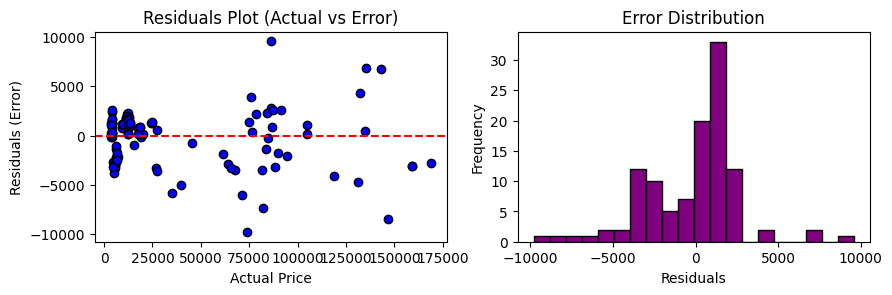

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Plot 1: Residuals (Error) Plot
plt.subplot(2,2,1)
residuals = y_test - y_pred
plt.scatter(y_test, residuals, color="blue", edgecolors='k')
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals Plot (Actual vs Error)")
plt.xlabel("Actual Price")
plt.ylabel("Residuals (Error)")

# Plot 2: Error distribution
plt.subplot(2,2,2)
plt.hist(residuals, bins=20, color='purple', edgecolor='black')
plt.title("Error Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

2. SVR

In [ ]:
svr_model = SVR()
svr_model.fit(x_train,y_train)

svr_pred = svr_model.predict(x_test)

print("R2 Score")
print(metrics.r2_score(y_test,svr_pred))
print()

print("Mean Absolute Error: ")
print(metrics.mean_absolute_error(y_test, svr_pred))
print()

print("Root Mean Squared Error: ")
print(np.sqrt(metrics.mean_squared_error(y_test,svr_pred)))

R2 Score
-0.3219046730719861

Mean Absolute Error: 
31274.1178104131

Root Mean Squared Error: 
51184.30808672874


Text(0, 0.5, 'Frequency')

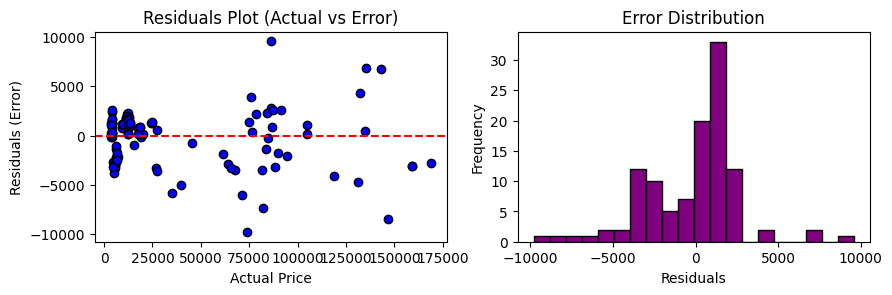

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Plot 1: Residuals (Error) Plot
plt.subplot(2,2,1)
residuals = y_test - y_pred
plt.scatter(y_test, residuals, color="blue", edgecolors='k')
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals Plot (Actual vs Error)")
plt.xlabel("Actual Price")
plt.ylabel("Residuals (Error)")

# Plot 2: Error distribution
plt.subplot(2,2,2)
plt.hist(residuals, bins=20, color='purple', edgecolor='black')
plt.title("Error Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

3. Ridge Regression


In [ ]:
ridge_model = Ridge()
ridge_model.fit(x_train,y_train)
ridge_pred = ridge_model.predict(x_test)

print("R2 Score")
print(metrics.r2_score(y_test,ridge_pred))
print()

print("Mean Absolute Error: ")
print(metrics.mean_absolute_error(y_test,ridge_pred))
print()

print("Root Mean Squared Error: ")
print(np.sqrt(metrics.mean_squared_error(y_test,ridge_pred)))

R2 Score
0.9958894547522954

Mean Absolute Error: 
2111.0992528310394

Root Mean Squared Error: 
2854.2136874874445


Text(0, 0.5, 'Frequency')

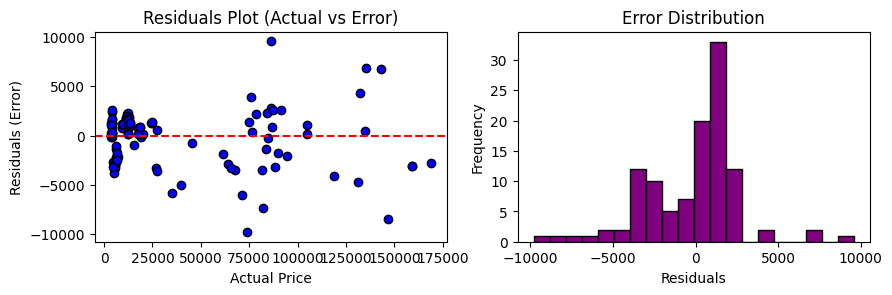

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Plot 1: Residuals (Error) Plot
plt.subplot(2,2,1)
residuals = y_test - y_pred
plt.scatter(y_test, residuals, color="blue", edgecolors='k')
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals Plot (Actual vs Error)")
plt.xlabel("Actual Price")
plt.ylabel("Residuals (Error)")

# Plot 2: Error distribution
plt.subplot(2,2,2)
plt.hist(residuals, bins=20, color='purple', edgecolor='black')
plt.title("Error Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

4. Lasso Regression


In [ ]:
lasso_model = Lasso()
lasso_model.fit(x_train,y_train)

lasso_pred = lasso_model.predict(x_test)

print("R2 Score")
print(metrics.r2_score(y_test,lasso_pred))
print()
print("Mean Absolute Error: ")
print(metrics.mean_absolute_error(y_test, lasso_pred))
print()

print("Root Mean Squared Error: ")
print(np.sqrt(metrics.mean_squared_error(y_test,lasso_pred)))

R2 Score
0.9958630020031614

Mean Absolute Error: 
2131.991418959642

Root Mean Squared Error: 
2863.3828747228413


Text(0, 0.5, 'Frequency')

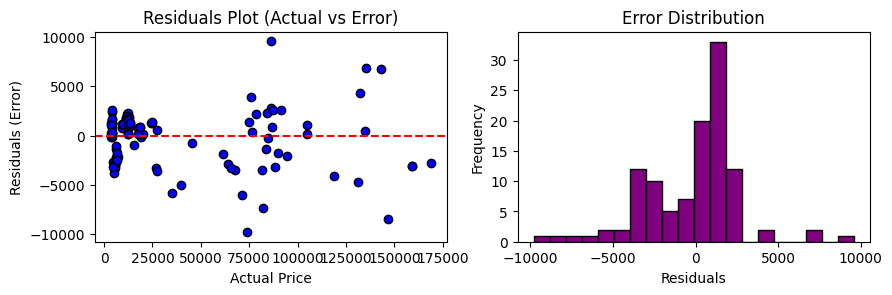

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Plot 1: Residuals (Error) Plot
plt.subplot(2,2,1)
residuals = y_test - y_pred
plt.scatter(y_test, residuals, color="blue", edgecolors='k')
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals Plot (Actual vs Error)")
plt.xlabel("Actual Price")
plt.ylabel("Residuals (Error)")

# Plot 2: Error distribution
plt.subplot(2,2,2)
plt.hist(residuals, bins=20, color='purple', edgecolor='black')
plt.title("Error Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

Optimizations

In [ ]:
models = {
    'SVR': {
        'model': SVR(),
        'param_grid': {
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [0.1, 1, 10, 100],
            'gamma': ['scale', 'auto'],
            'degree': [2, 3, 4]
        }
    },
    'Ridge': {
        'model': Ridge(),
        'param_grid': {
            'alpha': [0.1, 1, 10, 100, 1000]
        }
    },
    'Lasso': {
        'model': Lasso(),
        'param_grid': {
            'alpha': [0.1, 1, 10, 100, 1000]
        }
    }
}

def evaluate_model(y_true, y_pred):
    r2 = metrics.r2_score(y_true, y_pred)
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    return r2, mae, mape, mse, rmse

results = {}
for model_name, config in models.items():
    grid_search = GridSearchCV(estimator=config['model'], param_grid=config['param_grid'],
                               scoring='r2', cv=50, verbose=1, n_jobs=-1)

    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)
    r2, mae, mape, mse, rmse = evaluate_model(y_test, y_pred)

    results[model_name] = {
        'Best Parameters': grid_search.best_params_,
        'R2': r2,
        'MAE': mae,
        'MAPE': mape,
        'MSE': mse,
        'RMSE': rmse
    }

results_df = pd.DataFrame(results).T
for model in results_df.index:
    print(f"Metrics for {model}:")
    print(f"  Best Parameters: {results_df.loc[model, 'Best Parameters']}")
    print(f"  R2: {results_df.loc[model, 'R2']}")
    print(f"  MAE: {results_df.loc[model, 'MAE']}")
    print(f"  MAPE: {results_df.loc[model, 'MAPE']}")
    print(f"  MSE: {results_df.loc[model, 'MSE']}")
    print(f"  RMSE: {results_df.loc[model, 'RMSE']}")
    print()

Fitting 50 folds for each of 96 candidates, totalling 4800 fits
Fitting 50 folds for each of 5 candidates, totalling 250 fits
Fitting 50 folds for each of 5 candidates, totalling 250 fits
Metrics for SVR:
  Best Parameters: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
  R2: 0.9820921200840802
  MAE: 4093.2338932869607
  MAPE: 23.611155044273787
  MSE: 35490956.93573771
  RMSE: 5957.428718477268

Metrics for Ridge:
  Best Parameters: {'alpha': 0.1}
  R2: 0.9958689075491223
  MAE: 2129.8207321469213
  MAPE: 14.051803034633755
  MSE: 8187257.506753364
  RMSE: 2861.3384117844857

Metrics for Lasso:
  Best Parameters: {'alpha': 0.1}
  R2: 0.995863063527459
  MAE: 2132.565426877077
  MAPE: 14.13177914227475
  MSE: 8198839.554553411
  RMSE: 2863.3615829219702



In [ ]:
svr_model = SVR(C=100, degree=2,gamma='scale',kernel='linear')
svr_model.fit(x_train,y_train)

svr_pred = svr_model.predict(x_test)

print("R2 Score")
print(metrics.r2_score(y_test,svr_pred))
print()

print("Mean Absolute Error: ")
print(metrics.mean_absolute_error(y_test, svr_pred))
print()

print("Root Mean Squared Error: ")
print(np.sqrt(metrics.mean_squared_error(y_test,svr_pred)))

R2 Score
0.9820921200840802

Mean Absolute Error: 
4093.2338932869607

Root Mean Squared Error: 
5957.428718477268


Text(0, 0.5, 'Frequency')

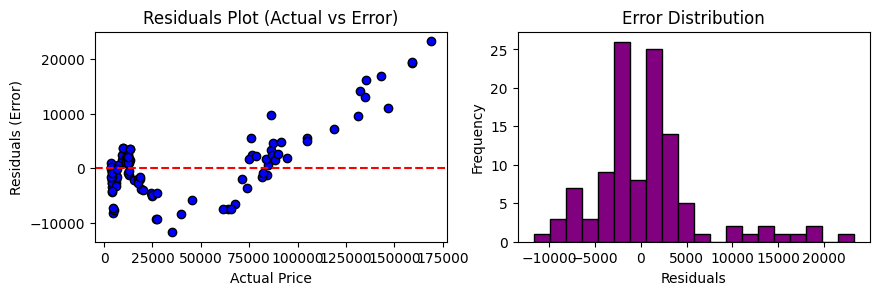

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Plot 1: Residuals (Error) Plot
plt.subplot(2,2,1)
residuals = y_test - svr_pred
plt.scatter(y_test, residuals, color="blue", edgecolors='k')
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals Plot (Actual vs Error)")
plt.xlabel("Actual Price")
plt.ylabel("Residuals (Error)")

# Plot 2: Error distribution
plt.subplot(2,2,2)
plt.hist(residuals, bins=20, color='purple', edgecolor='black')
plt.title("Error Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

In [ ]:
ridge_model = Ridge(alpha = 0.1)
ridge_model.fit(x_train,y_train)
ridge_pred = ridge_model.predict(x_test)

print("R2 Score")
print(metrics.r2_score(y_test,ridge_pred))
print()

print("Mean Absolute Error: ")
print(metrics.mean_absolute_error(y_test,ridge_pred))
print()

print("Root Mean Squared Error:")
print(np.sqrt(metrics.mean_squared_error(y_test,ridge_pred)))

R2 Score
0.9958689075491223

Mean Absolute Error: 
2129.8207321469213

Root Mean Squared Error:
2861.3384117844857


Text(0, 0.5, 'Frequency')

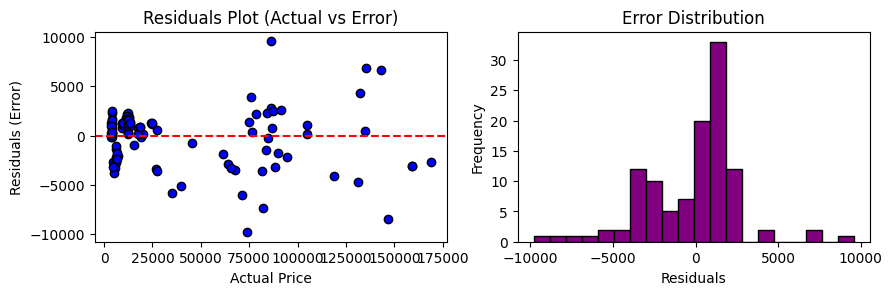

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Plot 1: Residuals (Error) Plot
plt.subplot(2,2,1)
residuals = y_test - ridge_pred
plt.scatter(y_test, residuals, color="blue", edgecolors='k')
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals Plot (Actual vs Error)")
plt.xlabel("Actual Price")
plt.ylabel("Residuals (Error)")

# Plot 2: Error distribution
plt.subplot(2,2,2)
plt.hist(residuals, bins=20, color='purple', edgecolor='black')
plt.title("Error Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

In [ ]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train,y_train)

lasso_pred = lasso_model.predict(x_test)

print("R2 Score")
print(metrics.r2_score(y_test,lasso_pred))
print()
print("Mean Squared Error: ")
print(metrics.mean_absolute_error(y_test, lasso_pred))
print()

print("Root Mean Squared Error: ")
print(np.sqrt(metrics.mean_squared_error(y_test,lasso_pred)))

R2 Score
0.995863063527459

Mean Squared Error: 
2132.565426877077

Root Mean Squared Error: 
2863.3615829219702


Text(0, 0.5, 'Frequency')

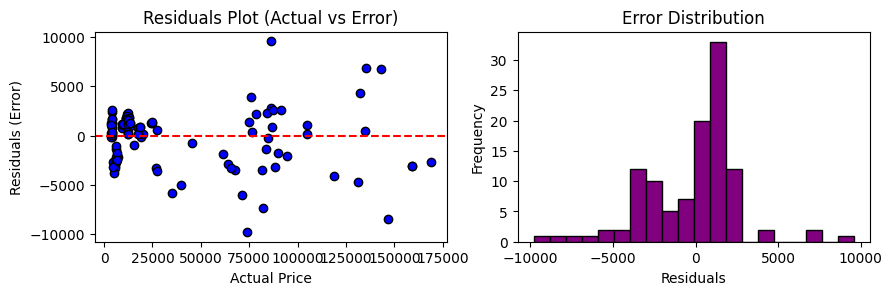

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Plot 1: Residuals (Error) Plot
plt.subplot(2,2,1)
residuals = y_test - lasso_pred
plt.scatter(y_test, residuals, color="blue", edgecolors='k')
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals Plot (Actual vs Error)")
plt.xlabel("Actual Price")
plt.ylabel("Residuals (Error)")

# Plot 2: Error distribution
plt.subplot(2,2,2)
plt.hist(residuals, bins=20, color='purple', edgecolor='black')
plt.title("Error Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")